In [3]:
import os
import glob
import cv2
import numpy as np
import imgaug as ia 
import imgaug.augmenters as iaa
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
def color_and_negative(image):
    negative_list = []
    title_list = []
    
    # color, gray 
    color_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    negative_list.append(np.asarray(color_img))
    title_list.append("colored")
    
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    negative_list.append(np.asarray(gray_img))
    title_list.append("gray")
    
    #colored negative and gray negative
    colored_negative = abs(255 - color_img)
    negative_list.append(np.asarray(colored_negative))
    title_list.append("colr_neg")
    
    gray_negative = abs(255 - gray_img)
    negative_list.append(np.asarray(gray_negative))
    title_list.append("gray_neg")
    
    return negative_list, title_list

In [5]:
def flip(image):
    flip_list = []
    title_list = []
    
    #Horizontal Flip
    hflip = iaa.Fliplr(p=1.0)
    hf_img = hflip.augment_image(image)
    flip_list.append(np.asarray(hf_img))
    title_list.append("h_flip")
    
    #Vertical Flip
    vflip = iaa.Flipud(p=1.0)
    vf_img = vflip.augment_image(image)
    flip_list.append(np.asarray(vf_img))
    title_list.append("v_flip")
    
    return flip_list, title_list

In [10]:
def rotation(image):
    rotate_list = []
    title_list = []
    
    for i in range(25, 355, 30):
        rotation = iaa.Affine(rotate=(-i, i))
        rotated_img = rotation.augment_image(image)
        rotate_list.append(np.asarray(rotated_img))
        title_list.append("rotation"+str(i))
    
    return rotate_list, title_list

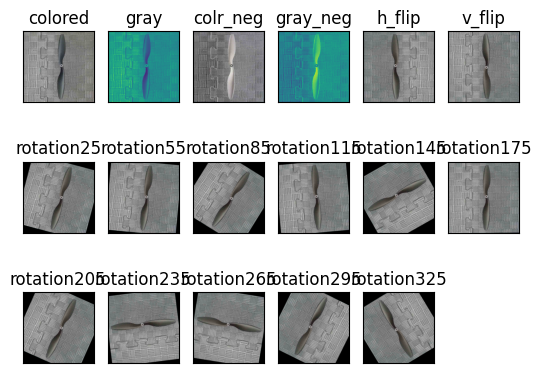

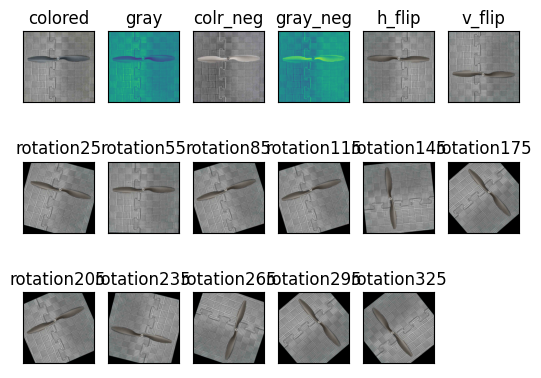

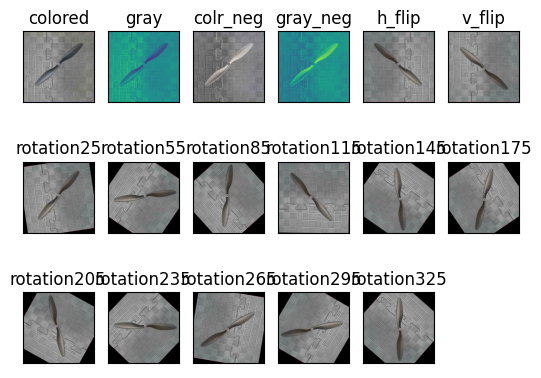

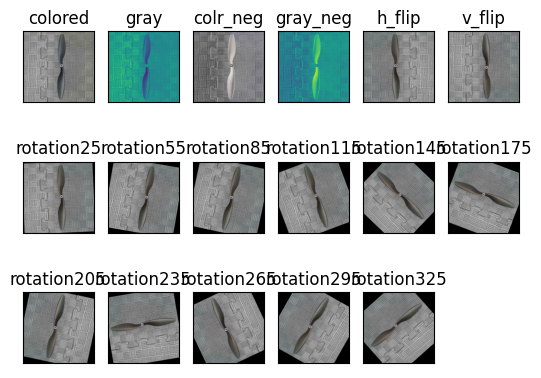

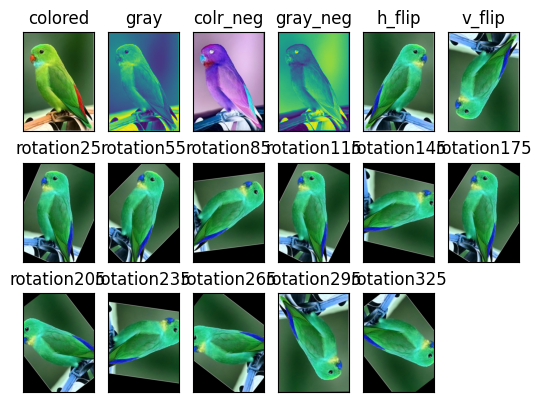

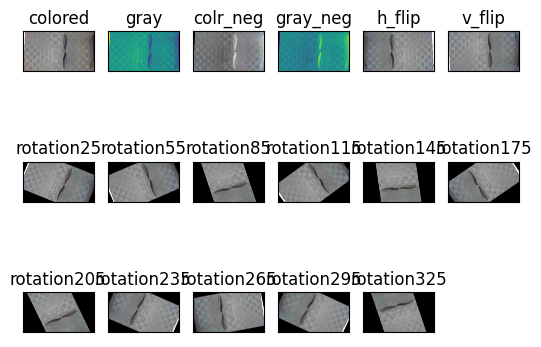

In [20]:
imdir = 'images/'
ext = ['jpg', 'jpeg']   

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]
          
total_image = len(images)

aug_img_list = []
labels = []

for i in range(total_image):
    
    # negative image augmentation
    negative_res, titles = color_and_negative(images[i])
    aug_img_list = negative_res
    labels = titles
    
    # flip augmentation
    flip_res, titles = flip(images[i])
    aug_img_list.extend(flip_res)
    labels.extend(titles)
    
    # rotation images between 25° and 360°
    rotation_res, titles = rotation(images[i])
    aug_img_list.extend(rotation_res)
    labels.extend(titles)
    
    img_name = Path(files[i]).stem
        
    for j in range(len(labels)):
        
        #isWritten = cv2.imwrite('E:/Thesis_Task/Augmentation/augmented_images/'+img_name+'_'+labels[j]+'.jpg', aug_img_list[j])
        
        plt.subplot(3,6, j+1)
        plt.title(labels[j])
        plt.imshow(aug_img_list[j])
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    aug_img_list = []
    labels = []